# RII_Pandas User's Guide
---

RII_Pandas is Python 3 + [Pandas](https://pandas.pydata.org/)  wrapper for the [refractiveindex.info database](http://refractiveindex.info/) developed by [Mikhail Polyanskiy](https://github.com/polyanskiy).
It provides Pandas DataFrames for the catalog and experimental data stored in refractiveindex.info database based on the method of `dboperations.py` from [refractiveindex.info-sqlite package](https://github.com/HugoGuillen/refractiveindex.info-sqlite) developed by [Hugo Guillén](https://github.com/HugoGuillen). This package will make it easy to access dielectric properties of various materials in a Python framework. 

### Features
- Create Pandas DataFrame by parsing database files cloned from Polyanskiy's  [GitHub repository](https://github.com/polyanskiy/refractiveindex.info-database).
- Drude-Lorentz model (formula 21) and Brendel-Bormann model (formula 22) are available to describe metallic dielectric function.



# Install
## Install and update using pip
```
$ pip install -U riip
```
## Install using conda
```
$ conda install -c mnishida riip
```


# Tutorial
Let's start your survay of dielectric properties of various materials. The first thing you must do is to create a RiiDataFrame oject. The first trial will take a few minutes, because experimental data will be pulled down from Polyanskiy's [refractiveindex.info database](https://github.com/polyanskiy/refractiveindex.info-database) and equi-spaced grid data will be obtained by interpolating the experimental data.

In [1]:
import riip
ri = riip.RiiDataFrame()

You can use some helper methods for your survay.


## __search__
```
search(name: str) -> DataFrame
```
This method searches data that contain given __name__ of material and return a catalog for them.

In [2]:
ri.search("NaCl")

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
182,NaCl,,Li,1,f,0.20,30.0000
183,NaCl,,Querry,0,nk,0.22,166.6667


In [3]:
ri.search("sodium").head(5) # upper or lower case is not significant

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
127,NaBr,,Li,1,f,0.210,34.0000
182,NaCl,,Li,1,f,0.200,30.0000
183,NaCl,,Querry,0,nk,0.220,166.6667
229,NaF,,Li,1,f,0.150,17.0000
295,NaI,,Jellison,1,f,0.436,0.6330


## __select__
```
select(condition: str) -> DataFrame
```
This method make a query with the given __condition__ and return a catalog.  For example, if you want to find a material whose refractive index n is in a range 2.5 < n < 3 somewhere in the wavelength range 0.4&mu;m < wl < 0.8&mu;m:

In [4]:
ri.select("2.5 < n < 3 and 0.4 < wl < 0.8").head(5)

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
23,Al,Experimental data,Mathewson,0,nk,0.495940,1.771200
118,Bi,Experimental data,Hagemann,0,nk,0.000002,6.199000
129,TlBr,,Palik,1,f,0.570000,39.400000
135,C,Amorphous thin film,Larruquert,0,nk,0.019656,10.079189
137,C,Graphite,Djurisic-o,0,nk,0.030996,10.332000


## __show__
```
show(ids: int | Sequence[int]) -> DataFrame
```
This method shows the catalog for given __ids__.

In [5]:
ri.show([23, 118])

,book,section,page,formula,tabulated,wl_min,wl_max
id,,,,,,,
23,Al,Experimental data,Mathewson,0,nk,0.495940,1.7712
118,Bi,Experimental data,Hagemann,0,nk,0.000002,6.1990


## __read__
```
read(id, as_dict=False)
```
This method returns the contants of a page associated with the id.

In [6]:
print(ri.read(23))

# this file is part of refractiveindex.info database
# refractiveindex.info database is in the public domain
# copyright and related rights waived via CC0 1.0

REFERENCES: "A. G. Mathewson and H. P. Myers. Absolute values of the optical constants of some pure metals, <a href=\"https://doi.org/10.1088/0031-8949/4/6/009\"><i>Phys. Scr.</i> <b>4</b>, 291-292 (1971)</a>"
COMMENTS: "298 K (24.85 °C)"
DATA:
  - type: tabulated nk
    data: |
        0.49594 0.77909 5.84012
        0.50606 0.81783 5.93033
        0.51660 0.85227 6.10134
        0.52759 0.89107 6.22848
        0.53906 0.94408 6.35541
        0.55104 1.00461 6.51991
        0.56356 1.06864 6.64394
        0.57667 1.14503 6.76839
        0.59040 1.21981 6.92733
        0.60480 1.30548 7.08550
        0.61992 1.40111 7.20855
        0.63582 1.50675 7.36684
        0.65255 1.62810 7.49338
        0.67018 1.77579 7.65855
        0.68880 1.94186 7.82757
        0.70848 2.13059 8.00246
        0.72932 2.33676 8.15233
        0.75142 

## __references__
```
references(id: int)
```
This method returns the REFERENCES of a page associated with the id.

In [7]:
ri.references(23)

## __plot__
```
plot(id: int, comp: str = "n", fmt1: str = "-", fmt2: str = "--", **kwargs)
```
* id: ID number
* comp: 'n', 'k' or 'eps'
* fmt1 (Union[str, None]): Plot format for n and Re(eps), such as "-", "--", ":", etc.
* fmt2 (Union[str, None]): Plot format for k and Im(eps).

This plot uses 200 data points only. If you want more fine plots, use __plot__ method of __RiiMaterial__ explained below. 

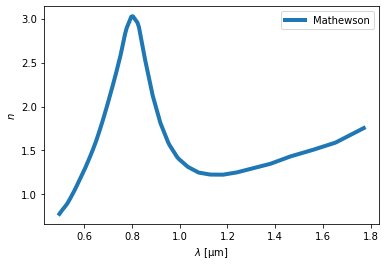

In [8]:
ri.plot(23, "n")

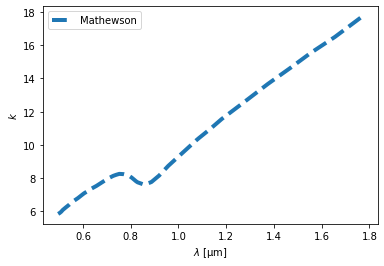

In [9]:
ri.plot(23, "k")

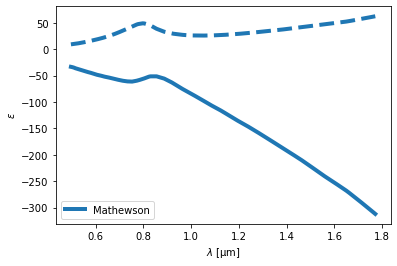

In [10]:
ri.plot(23, "eps")

## __material__
```
material(id: int, bound_check: bool = True) -> RiiMaterial
```
This method returns __RiiMaterial__-class instance for given __id__.

In [11]:
Al = ri.material(23)
type(Al)

riip.material.RiiMaterial

Using the created RiiMaterial object, you can get refractive index n, extinction coefficient k, and dielectric function eps, and plot them.
### __RiiMaterial.n__
```
n(wl: ArrayLike) -> ArrayLike
```

In [12]:
Al.n(1.0)  # refractive index at wavelength = 1.0μm

1.3947200314541495

### __RiiMaterial.k__
```
k(wl: ArrayLikey) -> ArrayLike
```

In [13]:
Al.k(1.0)  # extinction coeeficient at wavelength = 1.0μm

9.298715371400919


### __RiiMaterial.eps__
```
eps(wl: ArrayLike) -> ArrayLike
```

In [14]:
Al.eps(1.0)  # permittivity at wavelength = 1.0μm

(-84.52086359218826+25.938209190566944j)

Wavelengths __wl__ can be a single complex value or an array of complex values.

In [15]:
import numpy as np
wls = np.linspace(0.5, 1.6)
Al.eps(wls)

array([ -33.89959068 +9.33900873j,  -37.29463488+10.77009236j,
        -40.46873897+12.53104777j,  -43.43127065+14.57158786j,
        -46.41114472+16.8374554j ,  -49.23714009+19.3311265j ,
        -51.85747431+22.05611875j,  -54.01998828+25.11998596j,
        -56.51068664+28.80349092j,  -58.84669759+32.87482628j,
        -60.65592316+37.16193553j,  -61.40611633+41.60007069j,
        -59.98552164+46.17555894j,  -57.12970492+48.53061299j,
        -53.54847843+47.19547072j,  -51.53367923+43.03777568j,
        -52.05598693+37.78383285j,  -54.99575046+33.81403989j,
        -59.71288823+31.1893285j ,  -65.25947916+29.14010906j,
        -71.63000158+27.72572152j,  -77.3531254 +26.79084742j,
        -82.99701587+25.98546723j,  -88.64503898+25.78920576j,
        -94.45205457+25.63329073j, -100.40584166+25.74290453j,
       -106.32796905+25.90456938j, -111.77881933+26.32061275j,
       -117.39116043+26.74299988j, -123.5667053 +27.41273852j,
       -129.89851029+28.0816868j , -135.76446661+28.856


### __RiiMaterial.plot__
```
plot(wls: np.ndarray, comp: str = "n", fmt1: str = "-", fmt2: str = "--", **kwargs)
```
* wls: Wavelength
* comp: 'n', 'k' or 'eps'
* fmt1 (Union[str, None]): Plot format for n and Re(eps), such as "-", "--", ":", etc.
* fmt2 (Union[str, None]): Plot format for k and Im(eps).

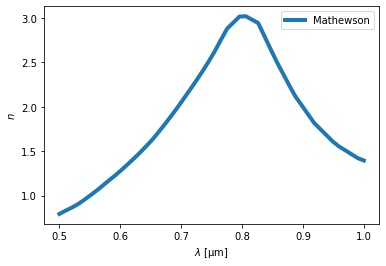

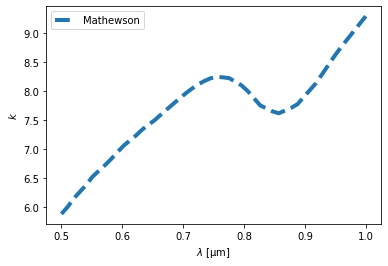

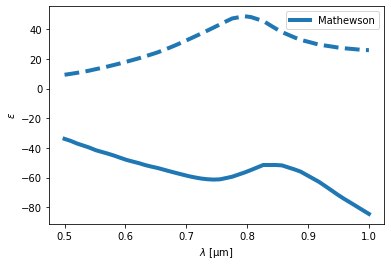

In [22]:
import matplotlib.pyplot as plt
wls = np.linspace(0.5, 1.0)
Al.plot(wls, "n")
plt.show()
Al.plot(wls, "k")
plt.show()
Al.plot(wls, "eps")
plt.show()
